# Visualising Data

## Creating a treemap for level of education and country of birth

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import os
import pathlib
import numpy as np

In [75]:
root = pathlib.Path("data")
df = pd.read_csv(root / "Test Data csv.csv")  # creating dataframe
df.head()

,Unnamed: 0,Region,Total Population,No qualifications and Europe,No qualifications and Europe: United Kingdom,No qualifications and Europe: EU countries,No qualifications and Europe: EU countries: European Union EU14,No qualifications and Europe: EU countries: European Union EU8,No qualifications and Europe: EU countries: European Union EU2,No qualifications and Europe: EU countries: All other EU countries,...,Other qualifications and Europe: EU countries: European Union EU2,Other qualifications and Europe: EU countries: All other EU countries,Other qualifications and Europe: Non-EU countries,Other qualifications and Europe: Non-EU countries: All other non-EU countries,Other qualifications and Africa,Other qualifications and Middle East and Asia,Other qualifications and The Americas and the Caribbean,Other qualifications and Antarctica and Oceania (including Australasia) and Other,Other qualifications and British Overseas,Unnamed: 101
0,0.0,North East,2178960.0,423897.0,412439.0,10316.0,5027.0,3401.0,1500.0,386.0,...,184.0,47.0,140.0,140.0,544.0,1473.0,188.0,61.0,5.0,NaN
1,1.0,North West,6025635.0,1090412.0,1037644.0,48415.0,22154.0,18367.0,6923.0,969.0,...,900.0,126.0,566.0,566.0,2656.0,7169.0,892.0,206.0,38.0,NaN
2,2.0,Yorkshire and The Humber,4460299.0,858748.0,815228.0,40339.0,13113.0,20036.0,6329.0,860.0,...,811.0,110.0,407.0,407.0,1798.0,5193.0,623.0,166.0,27.0,NaN
3,3.0,East Midlands,3998045.0,721529.0,672066.0,44873.0,13905.0,21418.0,8480.0,1068.0,...,1237.0,155.0,669.0,669.0,2542.0,4887.0,737.0,163.0,39.0,NaN
4,4.0,West Midlands,4801326.0,916891.0,861329.0,51325.0,20129.0,18953.0,11300.0,941.0,...,1544.0,128.0,578.0,578.0,3087.0,8912.0,1209.0,173.0,64.0,NaN


In [76]:
 # removing overlapping data by having column for all countries in europe apart from UK

df['No qualifications and EU']=df['No qualifications and Europe']-df['No qualifications and Europe: United Kingdom']
df['Level 1 and entry level qualifications and EU']=df['Level 1 and entry level qualifications and Europe']-df['Level 1 and entry level qualifications and Europe: United Kingdom']
df['Level 2 qualifications and EU']=df['Level 2 qualifications and Europe']-df['Level 2 qualifications and Europe: United Kingdom']
df['Apprenticeship and EU']=df['Apprenticeship and Europe']-df['Apprenticeship and Europe: United Kingdom']
df['Level 3 qualifications and EU']=df['Level 3 qualifications and Europe']-df['Level 3 qualifications and Europe: United Kingdom']
df['Level 4 qualifications and above and EU']=df['Level 4 qualifications and above and Europe']-df['Level 4 qualifications and above and Europe: United Kingdom']
df['Other qualifications and EU']=df['Other qualifications and Europe']-df['Other qualifications and Europe: United Kingdom']

df.head()


,Unnamed: 0,Region,Total Population,No qualifications and Europe,No qualifications and Europe: United Kingdom,No qualifications and Europe: EU countries,No qualifications and Europe: EU countries: European Union EU14,No qualifications and Europe: EU countries: European Union EU8,No qualifications and Europe: EU countries: European Union EU2,No qualifications and Europe: EU countries: All other EU countries,...,Other qualifications and Antarctica and Oceania (including Australasia) and Other,Other qualifications and British Overseas,Unnamed: 101,No qualifications and EU,Level 1 and entry level qualifications and EU,Level 2 qualifications and EU,Apprenticeship and EU,Level 3 qualifications and EU,Level 4 qualifications and above and EU,Other qualifications and EU
0,0.0,North East,2178960.0,423897.0,412439.0,10316.0,5027.0,3401.0,1500.0,386.0,...,61.0,5.0,NaN,11458.0,5412.0,7813.0,3750.0,10474.0,16121.0,1409.0
1,1.0,North West,6025635.0,1090412.0,1037644.0,48415.0,22154.0,18367.0,6923.0,969.0,...,206.0,38.0,NaN,52768.0,26192.0,36796.0,15898.0,47704.0,84453.0,6864.0
2,2.0,Yorkshire and The Humber,4460299.0,858748.0,815228.0,40339.0,13113.0,20036.0,6329.0,860.0,...,166.0,27.0,NaN,43520.0,21251.0,28743.0,12953.0,36773.0,62251.0,5582.0
3,3.0,East Midlands,3998045.0,721529.0,672066.0,44873.0,13905.0,21418.0,8480.0,1068.0,...,163.0,39.0,NaN,49463.0,26359.0,35311.0,15192.0,46445.0,73905.0,7216.0
4,4.0,West Midlands,4801326.0,916891.0,861329.0,51325.0,20129.0,18953.0,11300.0,941.0,...,173.0,64.0,NaN,55562.0,27074.0,36485.0,13855.0,44818.0,77367.0,7593.0


In [77]:
 # dropping overlapping columns that are now covered in those labelled EU containing all countries in Europe except UK

dropcolumns=['Unnamed: 0',
 'Total Population',
 'Unnamed: 101',
 'No qualifications and Europe',
 'No qualifications and Europe: EU countries',
 'No qualifications and Europe: EU countries: European Union EU14',
 'No qualifications and Europe: EU countries: European Union EU8',
 'No qualifications and Europe: EU countries: European Union EU2',
 'No qualifications and Europe: EU countries: All other EU countries',
 'No qualifications and Europe: Non-EU countries',
 'No qualifications and Europe: Non-EU countries: All other non-EU countries', 
 'Level 1 and entry level qualifications and Europe',
 'Level 1 and entry level qualifications and Europe: EU countries',
 'Level 1 and entry level qualifications and Europe: EU countries: European Union EU14',
 'Level 1 and entry level qualifications and Europe: EU countries: European Union EU8',
 'Level 1 and entry level qualifications and Europe: EU countries: European Union EU2',
 'Level 1 and entry level qualifications and Europe: EU countries: All other EU countries',
 'Level 1 and entry level qualifications and Europe: Non-EU countries',
 'Level 1 and entry level qualifications and Europe: Non-EU countries: All other non-EU countries',
 'Level 2 qualifications and Europe',
 'Level 2 qualifications and Europe: EU countries',
 'Level 2 qualifications and Europe: EU countries: European Union EU14',
 'Level 2 qualifications and Europe: EU countries: European Union EU8',
 'Level 2 qualifications and Europe: EU countries: European Union EU2',
 'Level 2 qualifications and Europe: EU countries: All other EU countries',
 'Level 2 qualifications and Europe: Non-EU countries',
 'Level 2 qualifications and Europe: Non-EU countries: All other non-EU countries',
 'Apprenticeship and Europe',
 'Apprenticeship and Europe: EU countries',
 'Apprenticeship and Europe: EU countries: European Union EU14',
 'Apprenticeship and Europe: EU countries: European Union EU8',
 'Apprenticeship and Europe: EU countries: European Union EU2',
 'Apprenticeship and Europe: EU countries: All other EU countries',
 'Apprenticeship and Europe: Non-EU countries',
 'Apprenticeship and Europe: Non-EU countries: All other non-EU countries',
 'Level 3 qualifications and Europe',
 'Level 3 qualifications and Europe: EU countries',
 'Level 3 qualifications and Europe: EU countries: European Union EU14',
 'Level 3 qualifications and Europe: EU countries: European Union EU8',
 'Level 3 qualifications and Europe: EU countries: European Union EU2',
 'Level 3 qualifications and Europe: EU countries: All other EU countries',
 'Level 3 qualifications and Europe: Non-EU countries',
 'Level 3 qualifications and Europe: Non-EU countries: All other non-EU countries',
 'Level 4 qualifications and above and Europe',
 'Level 4 qualifications and above and Europe: EU countries',
 'Level 4 qualifications and above and Europe: EU countries: European Union EU14',
 'Level 4 qualifications and above and Europe: EU countries: European Union EU8',
 'Level 4 qualifications and above and Europe: EU countries: European Union EU2',
 'Level 4 qualifications and above and Europe: EU countries: All other EU countries',
 'Level 4 qualifications and above and Europe: Non-EU countries',
 'Level 4 qualifications and above and Europe: Non-EU countries: All other non-EU countries',
 'Other qualifications and Europe',
 'Other qualifications and Europe: EU countries',
 'Other qualifications and Europe: EU countries: European Union EU14',
 'Other qualifications and Europe: EU countries: European Union EU8',
 'Other qualifications and Europe: EU countries: European Union EU2',
 'Other qualifications and Europe: EU countries: All other EU countries',
 'Other qualifications and Europe: Non-EU countries',
 'Other qualifications and Europe: Non-EU countries: All other non-EU countries']
treemap_df=df.drop(columns=dropcolumns).melt(id_vars='Region')
treemap_df.tail(10)

,Region,variable,value
2195,NaN,Other qualifications and EU,NaN
2196,NaN,Other qualifications and EU,NaN
2197,NaN,Other qualifications and EU,NaN
2198,NaN,Other qualifications and EU,NaN
2199,NaN,Other qualifications and EU,NaN
2200,NaN,Other qualifications and EU,NaN
2201,NaN,Other qualifications and EU,NaN
2202,NaN,Other qualifications and EU,NaN
2203,NaN,Other qualifications and EU,NaN
2204,NaN,Other qualifications and EU,NaN


In [78]:
 # removing NaN values

treemap_df = treemap_df[-np.isnan(treemap_df.value)]

In [79]:
treemap_df.rename(columns={"value": "People identified"}, inplace=True)
treemap_df.head()

,Region,variable,People identified
0,North East,No qualifications and Europe: United Kingdom,412439.0
1,North West,No qualifications and Europe: United Kingdom,1037644.0
2,Yorkshire and The Humber,No qualifications and Europe: United Kingdom,815228.0
3,East Midlands,No qualifications and Europe: United Kingdom,672066.0
4,West Midlands,No qualifications and Europe: United Kingdom,861329.0


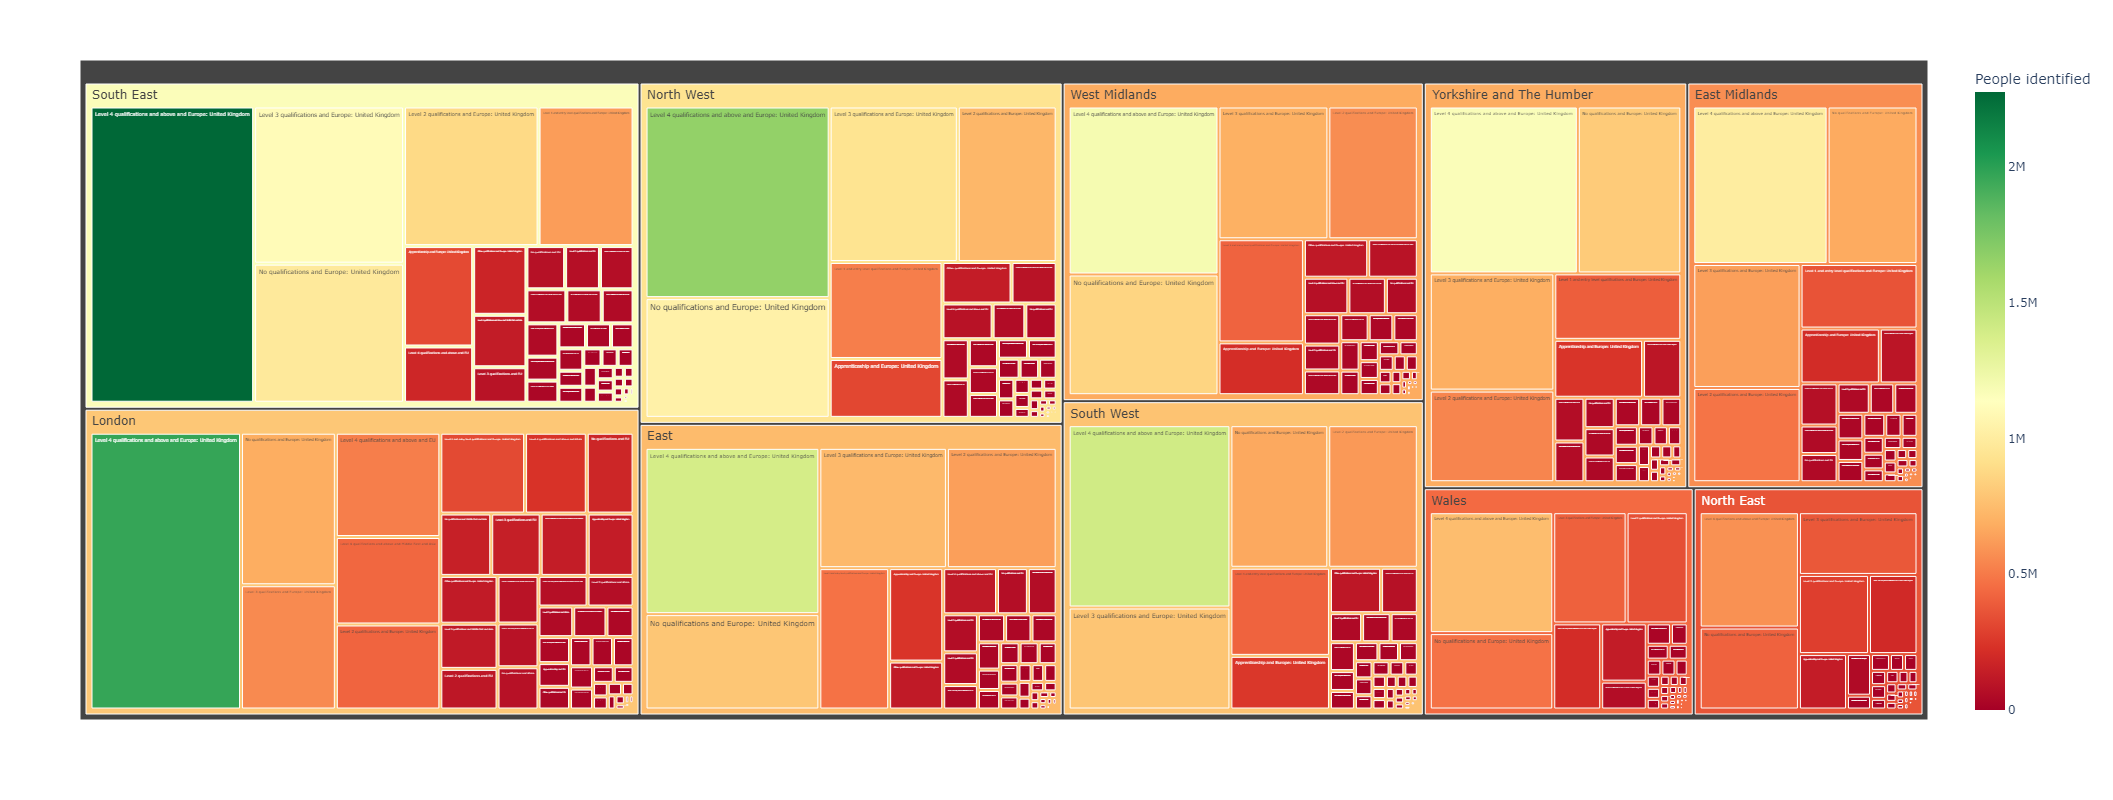

In [82]:
 # creates treemap with all regions and gives colour key based on number of people identified
 # more green is more poeple identified so theres a lower risk of indviduals being personally identified
 # more red is less people identified so theres a higher risk of individuals being personally identified

fig = px.treemap(
    treemap_df,path=['Region','variable'],
    values='People identified',
    width=1600, height=800, 
    color='People identified',
    color_continuous_scale='rdylgn'
)
fig.show()

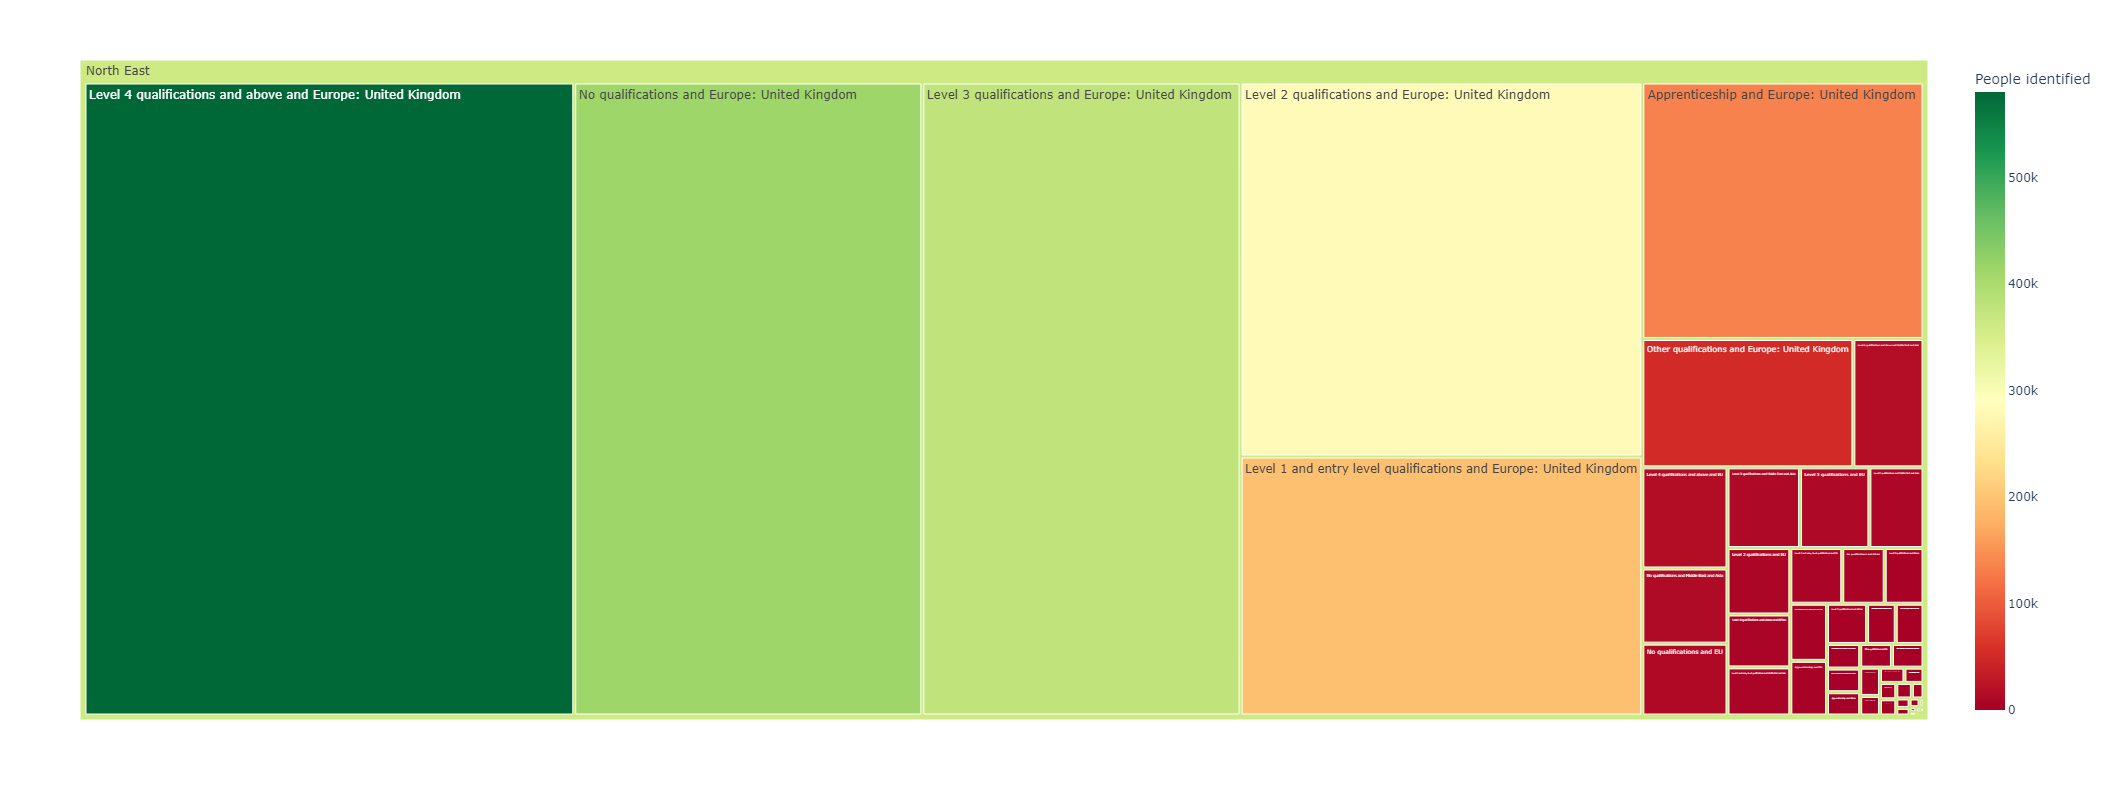

In [86]:
# creating a treemap of a more specific location

fig = px.treemap(
    treemap_df.loc[treemap_df['Region']=='North East'],path=['Region','variable'],
    values='People identified',
    width=1600, height=800,
    color='People identified',
    color_continuous_scale='rdylgn',
)

fig.show()

# ideally this code would create the size of the box ased on risk (larger box correlates to larger risk) however time became a limitation when attempting this